In [1]:
import numpy as np 
import astropy.constants as c
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import gc
import math
#list all the constants used
G=c.G.value
M_sun=c.M_sun.value
M_earth=c.M_earth.value
R_sun=c.R_sun.value
R_earth=c.R_earth.value
hour=3600 #s
day=3600*24
e=0.1
t_LC=1765.5 #s

def delta(Rp, Rs):
    delta = (Rp*R_earth / (Rs*R_sun))**2*1e6
    return delta

def SNR(delta,n,sigma_s):
    SNR=delta*n**0.5/sigma_s
    return SNR

def sigma_s(t, sigma_LC, cdppindex): #t/hour
    t_LC=1765.5/hour 

    return sigma_LC*(t/t_LC)**cdppindex

def t_dur(P,Rs,e,a): #hour
    t_dur = P*day*Rs*R_sun*(1-e**2)/(np.pi*a)/hour
    return t_dur

def a(Ms,P):
    a=((G*Ms*M_sun*(P*day)**2)/(4*np.pi**2))**(1/3)
    return a 

def n(t_obs,P): # the unite of t_obs and P is day
    n=t_obs/P
    return n

def f_n(t_obs,P):
    if t_obs <=2*P:
        return 0
    if t_obs> 2*P and t_obs< 3*P:
        return (t_obs/P-2)
    if t_obs>=3*P:
        return 1
    
def f_eff(SNR):
    if SNR <=6:
        return 0
    if SNR >6 and SNR<=12:
        return (SNR-6)/6
    if SNR>12:
        return 1
    
def f_geo(Rp,Rs,a,e):
    f_geo = (Rp*R_earth+Rs*R_sun)/(a*(1-e**2))
    return f_geo


/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


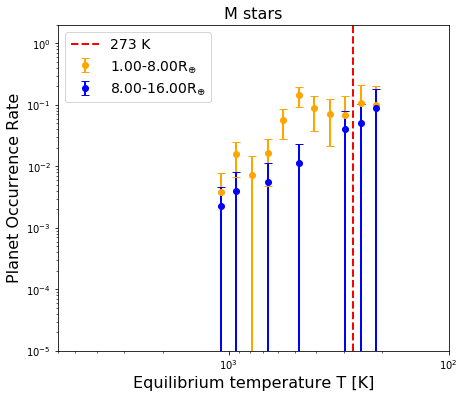

In [7]:
#M type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/data/kepler_stellar_q17_add_dispersions_reduction_reduction_M.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/data/kepler_koi_q17_add_dispersions_reduction_reduction_M.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),25,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/result/occurrence_rate_M_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
#bins_radius_new=[1,2,4,8,16]
bins_radius_new=[1,8,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
fig=plt.figure(figsize=(7,6))
for k in range(0,2):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i]\
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color=colors[k],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius_new[k])+'-'+'{:.2f}'.format(bins_radius_new[k+1])+'R$_{\oplus}$')

#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Equilibrium temperature T [K]', fontsize=16)
plt.ylabel('Planet Occurrence Rate',fontsize=16,)
plt.xlim(6000,100)
plt.ylim(1e-5,2)
x=[273]*1000
y=np.linspace(1e-5,2,1000)
plt.plot(x,y,'r--',linewidth=2,label='273 K')
plt.legend(loc='best',fontsize=14)
#plt.savefig('result/focc_rp_tot_2020.png',dpi=300)
plt.title('M stars',fontsize=16)
plt.savefig('result/focc_temperature_M_2020_r1-16_newbin.png',dpi=300)

/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dyz/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3199: RuntimeWarning: invalid value encountered in double_scalars
  low = [thisx - thiserr for thisx, thiserr


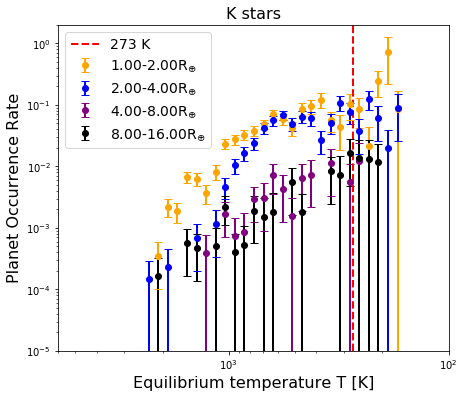

In [3]:
#K type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/data/kepler_stellar_q17_add_dispersions_reduction_reduction_K.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/data/kepler_koi_q17_add_dispersions_reduction_reduction_K.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),40,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/result/occurrence_rate_K_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,2,4,8,16]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
fig=plt.figure(figsize=(7,6))
for k in range(0,4):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        #and koi_table['koi_period'][f_id[j]]<=356
        for j in range(0,len(f_occurrence_everyplanet)):
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color=colors[k],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius_new[k])+'-'+'{:.2f}'.format(bins_radius_new[k+1])+'R$_{\oplus}$')

#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Equilibrium temperature T [K]', fontsize=16)
plt.ylabel('Planet Occurrence Rate',fontsize=16,)
plt.xlim(6000,100)
plt.ylim(1e-5,2)
x=[273]*1000
y=np.linspace(1e-5,2,1000)
plt.plot(x,y,'r--',linewidth=2,label='273 K')
plt.legend(loc='best',fontsize=14)
#plt.savefig('result/focc_rp_tot_2020.png',dpi=300)
plt.title('K stars',fontsize=16)
plt.savefig('result/focc_temperature_K_2020_p_r1-16_newbin2.png',dpi=300)

/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


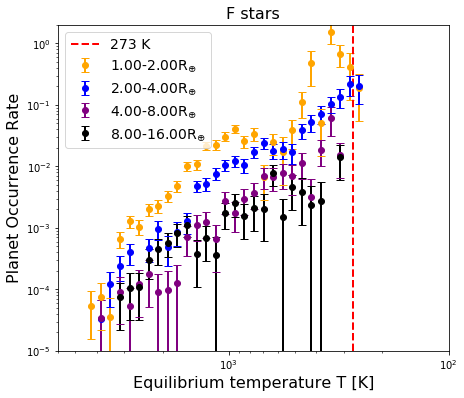

In [2]:
#F type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/data/kepler_stellar_q17_add_dispersions_reduction_reduction_F.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/data/kepler_koi_q17_add_dispersions_reduction_reduction_F.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),40,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/result/occurrence_rate_F_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,2,4,8,16]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
fig=plt.figure(figsize=(7,6))
for k in range(0,4):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        #and koi_table['koi_period'][f_id[j]]<=356\
        for j in range(0,len(f_occurrence_everyplanet)):
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i] \
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color=colors[k],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius_new[k])+'-'+'{:.2f}'.format(bins_radius_new[k+1])+'R$_{\oplus}$')

#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Equilibrium temperature T [K]', fontsize=16)
plt.ylabel('Planet Occurrence Rate',fontsize=16,)
plt.xlim(6000,100)
plt.ylim(1e-5,2)
x=[273]*1000
y=np.linspace(1e-5,2,1000)
plt.plot(x,y,'r--',linewidth=2,label='273 K')
plt.legend(loc='best',fontsize=14)
#plt.savefig('result/focc_rp_tot_2020.png',dpi=300)
plt.title('F stars',fontsize=16)
plt.savefig('result/focc_temperature_F_2020_p_r1-16_newbin2.png',dpi=300)

In [35]:
feh_low=[]
feh_high=[]
prad_low=[]
prad_high=[]
teff_low=[]
teff_high=[]
sigma_ra_low=[]
sigma_ra_high=[]
period_low=[]
period_high=[]
for i in range(0,len(f_occurrence_everyplanet)):
    if koi_table['koi_prad'][f_id[i]]<=4 and koi_table['koi_prad'][f_id[i]]>=1: 
        if teff_planet[f_id[i]]<=600:
            feh_low.append(koi_table['feh'][f_id[i]])
            prad_low.append(koi_table['koi_prad'][f_id[i]])
            teff_low.append(koi_table['teff_b2018'][f_id[i]])
            sigma_ra_low.append(koi_table['sigma_vra'][f_id[i]])
            period_low.append(koi_table['koi_period'][f_id[i]])
            
        else: 
            feh_high.append(koi_table['feh'][f_id[i]])
            prad_high.append(koi_table['koi_prad'][f_id[i]])
            teff_high.append(koi_table['teff_b2018'][f_id[i]])
            sigma_ra_high.append(koi_table['sigma_vra'][f_id[i]])
            period_high.append(koi_table['koi_period'][f_id[i]])
        

In [36]:
print(np.mean(feh_low),np.max(feh_low),np.min(feh_low))
print(np.mean(feh_high),np.max(feh_high),np.min(feh_high))

print(np.mean(prad_low),np.max(prad_low),np.min(prad_low))
print(np.mean(prad_high),np.max(prad_high),np.min(prad_high))

print(np.mean(teff_low),np.max(teff_low),np.min(teff_low))
print(np.mean(teff_high),np.max(teff_high),np.min(teff_high))

print(np.mean(sigma_ra_low),np.max(sigma_ra_low),np.min(sigma_ra_low))
print(np.mean(sigma_ra_high),np.max(sigma_ra_high),np.min(sigma_ra_high))


print(np.mean(period_low),np.max(period_low),np.min(period_low))
print(np.mean(period_high),np.max(period_high),np.min(period_high))




-0.036875000000000005 0.38 -0.68
-0.030941064638783274 0.48 -1.46
2.500427631578947 3.94 1.09
1.9477851711026613 4.0 1.0
5599.773026315789 5989.0 5202.0
5646.977186311787 5998.0 5200.0
0.7668227238319956 3.210482964713913 0.0025779247910493017
0.7116313831777294 4.910375570413817 0.0003408286650192797
141.58699664539145 601.13797 18.501089800000006
9.975377924374525 56.25908810000001 0.328686504


In [ ]:
print

(array([1168.,   76.,   30.,   21.,   10.,   16.,   17.,   10.,    5.,
           3.]),
 array([3.28686504e-01, 6.04096149e+01, 1.20490543e+02, 1.80571472e+02,
        2.40652400e+02, 3.00733328e+02, 3.60814257e+02, 4.20895185e+02,
        4.80976113e+02, 5.41057042e+02, 6.01137970e+02]),
 <a list of 10 Patch objects>)

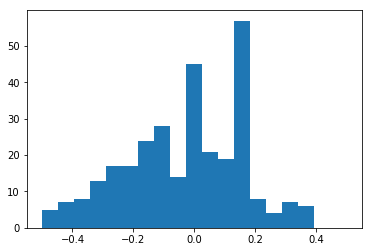

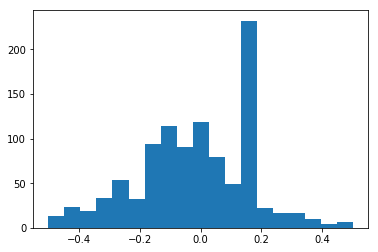

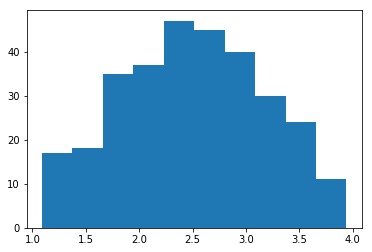

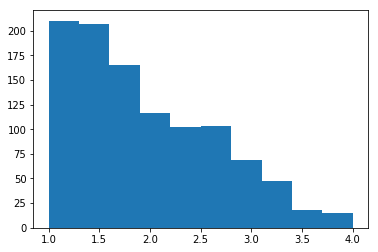

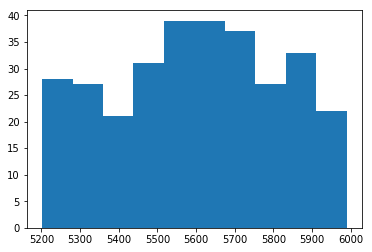

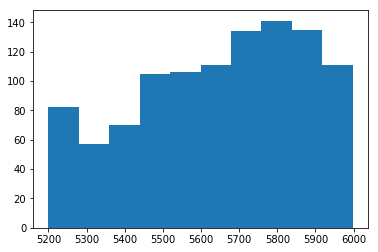

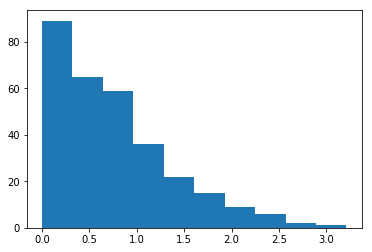

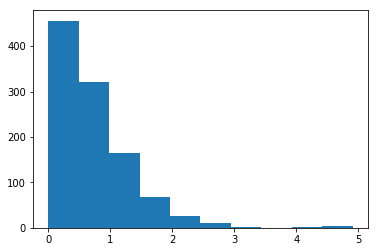

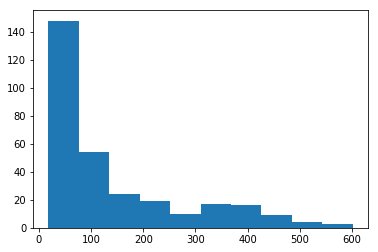

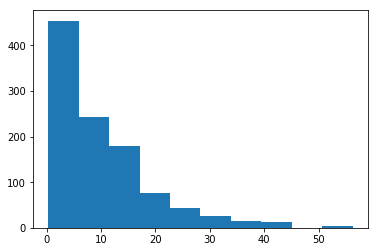

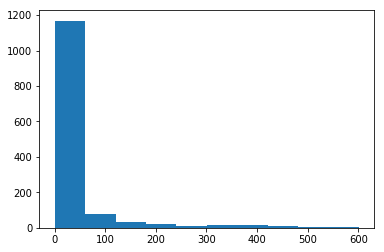

In [40]:
fig=plt.figure()
bins=np.linspace(-0.5,0.5,20)
plt.hist(feh_low,bins)

fig=plt.figure()
plt.hist(feh_high,bins)


fig=plt.figure()
plt.hist(prad_low,10)

fig=plt.figure()
plt.hist(prad_high,10)

fig=plt.figure()
plt.hist(teff_low,10)

fig=plt.figure()
plt.hist(teff_high,10)

fig=plt.figure()
plt.hist(sigma_ra_low,10)

fig=plt.figure()
plt.hist(sigma_ra_high,10)


fig=plt.figure()
plt.hist(period_low,10)

fig=plt.figure()
plt.hist(period_high,10)

fig=plt.figure()
plt.hist(period_high+period_low,10)


In [34]:
max(koi_table['koi_period'])

1064.2680956

/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/dyz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


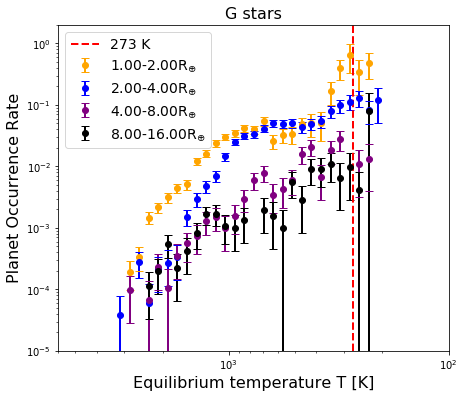

In [29]:
#G type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/data/kepler_stellar_q17_add_dispersions_reduction_reduction_G.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/data/kepler_koi_q17_add_dispersions_reduction_reduction_G.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),40,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/result/occurrence_rate_G_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,2,4,8,16]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
fig=plt.figure(figsize=(7,6))
for k in range(0,4):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            #and koi_table['koi_period'][f_id[j]]<=356
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i]\
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color=colors[k],elinewidth=2,capsize=4,label='{:.2f}'.format(bins_radius_new[k])+'-'+'{:.2f}'.format(bins_radius_new[k+1])+'R$_{\oplus}$')

#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Equilibrium temperature T [K]', fontsize=16)
plt.ylabel('Planet Occurrence Rate',fontsize=16,)
plt.xlim(6000,100)
plt.ylim(1e-5,2)
x=[273]*1000
y=np.linspace(1e-5,2,1000)
plt.plot(x,y,'r--',linewidth=2,label='273 K')
plt.legend(loc='best',fontsize=14)
#plt.savefig('result/focc_rp_tot_2020.png',dpi=300)
plt.title('G stars',fontsize=16)
plt.savefig('result/focc_temperature_G_2020_p_r1-16_newbin2.png',dpi=300)

In [30]:
feh_low=[]
feh_high=[]
prad_low=[]
prad_high=[]
teff_low=[]
teff_high=[]
sigma_ra_low=[]
sigma_ra_high=[]
for i in range(0,len(f_occurrence_everyplanet)):
    if koi_table['koi_prad'][f_id[i]]<=4 and koi_table['koi_prad'][f_id[i]]>=1: 
        if teff_planet[f_id[i]]<=600:
            feh_low.append(koi_table['feh'][f_id[i]])
            prad_low.append(koi_table['koi_prad'][f_id[i]])
            teff_low.append(koi_table['teff_b2018'][f_id[i]])
            sigma_ra_low.append(koi_table['sigma_vra'][f_id[i]])
            
        else: 
            feh_high.append(koi_table['feh'][f_id[i]])
            prad_high.append(koi_table['koi_prad'][f_id[i]])
            teff_high.append(koi_table['teff_b2018'][f_id[i]])
            sigma_ra_high.append(koi_table['sigma_vra'][f_id[i]])

In [31]:
print(np.mean(feh_low),np.max(feh_low),np.min(feh_low))
print(np.mean(feh_high),np.max(feh_high),np.min(feh_high))

print(np.mean(prad_low),np.max(prad_low),np.min(prad_low))
print(np.mean(prad_high),np.max(prad_high),np.min(prad_high))

print(np.mean(teff_low),np.max(teff_low),np.min(teff_low))
print(np.mean(teff_high),np.max(teff_high),np.min(teff_high))

print(np.mean(sigma_ra_low),np.max(sigma_ra_low),np.min(sigma_ra_low))
print(np.mean(sigma_ra_high),np.max(sigma_ra_high),np.min(sigma_ra_high))



-0.036875000000000005 0.38 -0.68
-0.030941064638783274 0.48 -1.46
2.500427631578947 3.94 1.09
1.9477851711026613 4.0 1.0
5599.773026315789 5989.0 5202.0
5646.977186311787 5998.0 5200.0
0.7668227238319956 3.210482964713913 0.0025779247910493017
0.7116313831777294 4.910375570413817 0.0003408286650192797


(array([456., 321., 165.,  68.,  27.,  10.,   1.,   0.,   1.,   3.]),
 array([3.40828665e-04, 4.91344303e-01, 9.82347777e-01, 1.47335125e+00,
        1.96435473e+00, 2.45535820e+00, 2.94636167e+00, 3.43736515e+00,
        3.92836862e+00, 4.41937210e+00, 4.91037557e+00]),
 <a list of 10 Patch objects>)

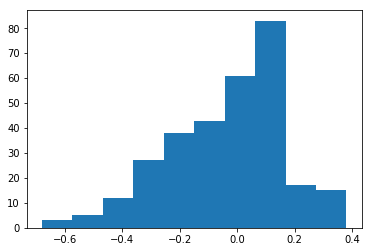

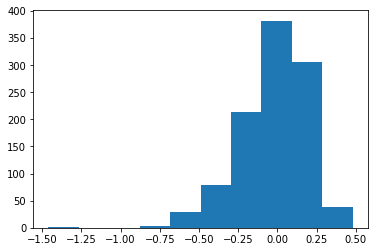

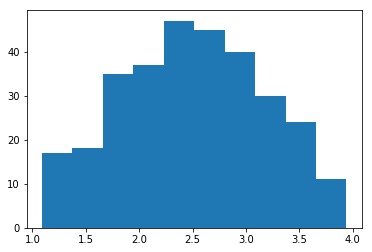

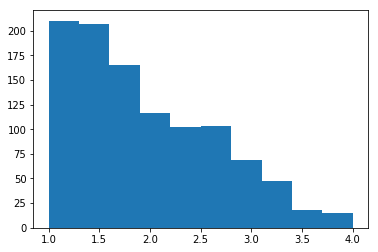

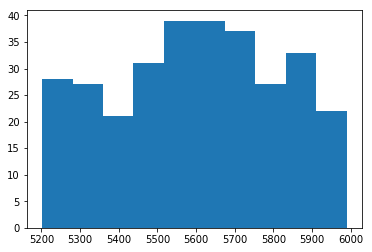

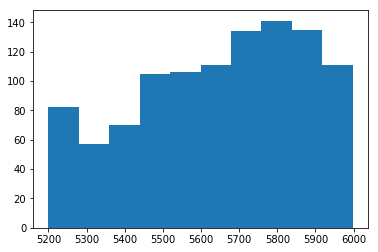

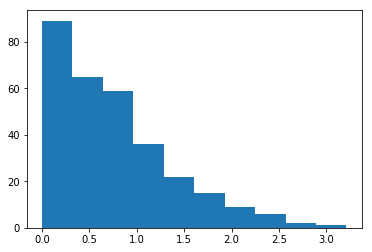

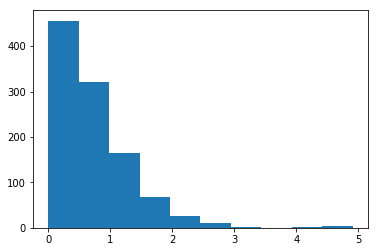

In [32]:
fig=plt.figure()
plt.hist(feh_low,10)

fig=plt.figure()
plt.hist(feh_high,10)


fig=plt.figure()
plt.hist(prad_low,10)

fig=plt.figure()
plt.hist(prad_high,10)

fig=plt.figure()
plt.hist(teff_low,10)

fig=plt.figure()
plt.hist(teff_high,10)

fig=plt.figure()
plt.hist(sigma_ra_low,10)

fig=plt.figure()
plt.hist(sigma_ra_high,10)

/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in double_scalars
/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:145: RuntimeWarning: invalid value encountered in double_scalars
/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:196: RuntimeWarning: invalid value encountered in double_scalars


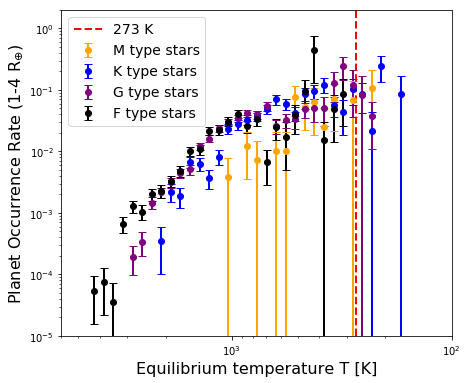

In [66]:
#M type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/data/kepler_stellar_q17_add_dispersions_reduction_reduction_M.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/data/kepler_koi_q17_add_dispersions_reduction_reduction_M.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),40,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/result/occurrence_rate_M_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
#bins_radius_new=[1,2,4,8,16]
bins_radius_new=[1,2]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i] and koi_table['koi_period'][f_id[j]]<=356\
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='orange',elinewidth=2,capsize=4,label='M type stars')
#    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='orange',elinewidth=2,capsize=4,label='M type stars')


#K type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/data/kepler_stellar_q17_add_dispersions_reduction_reduction_K.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/data/kepler_koi_q17_add_dispersions_reduction_reduction_K.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),40,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/result/occurrence_rate_K_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,2]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
#fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i] and koi_table['koi_period'][f_id[j]]<=356\
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='blue',elinewidth=2,capsize=4,label='K type stars')
#    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='blue',elinewidth=2,capsize=4,label='K type stars')

    
#G type stars    
stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/data/kepler_stellar_q17_add_dispersions_reduction_reduction_G.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/data/kepler_koi_q17_add_dispersions_reduction_reduction_G.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),40,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/result/occurrence_rate_G_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,2]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
#fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i] and koi_table['koi_period'][f_id[j]]<=356\
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='purple',elinewidth=2,capsize=4,label='G type stars')
#    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='purple',elinewidth=2,capsize=4,label='G type stars')

#F type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/data/kepler_stellar_q17_add_dispersions_reduction_reduction_F.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/data/kepler_koi_q17_add_dispersions_reduction_reduction_F.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),40,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/result/occurrence_rate_F_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,2]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
#fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    t_temp=[]
    t=[]
    t_std=[]
    for i in range(0,len(bins_t)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if teff_planet[f_id[j]]<bins_t[i+1] and teff_planet[f_id[j]]>=bins_t[i] and koi_table['koi_period'][f_id[j]]<=356\
            and koi_table['koi_prad'][f_id[j]]<=bins_radius_new[k+1] and koi_table['koi_prad'][f_id[j]]>=bins_radius_new[k]:     
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
                t_temp.append(teff_planet[f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
#        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
#        p_std.append(np.std(p_temp))
        t.append((bins_t[i+1]+bins_t[i])/2)
        t_std.append(np.std(t_temp))

        
    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='black',elinewidth=2,capsize=4,label='F type stars')
#    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='black',elinewidth=2,capsize=4,label='F type stars')
    
#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Equilibrium temperature T [K]', fontsize=16)
plt.ylabel('Planet Occurrence Rate (1-4 R$_{\oplus}$)',fontsize=16,)
plt.xlim(6000,100)
plt.ylim(1e-5,2)
x=[273]*1000
y=np.linspace(1e-5,2,1000)
plt.plot(x,y,'r--',linewidth=2,label='273 K')
plt.legend(loc='best',fontsize=14)
#plt.savefig('result/focc_rp_tot_2020.png',dpi=300)
#plt.title('M stars',fontsize=16)
plt.savefig('result/focc_temperature_FGKM_2020_p<365_r1-2_newbin.png',dpi=300)
#plt.savefig('result/focc_p_FGKM_2020_p<250_r1-4_newbin.png',dpi=300)


/home/dyz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


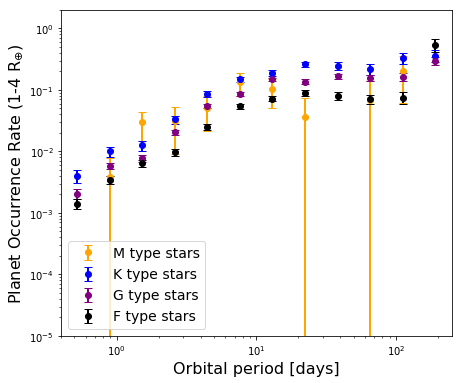

In [30]:
#M type star
'''
stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/data/kepler_stellar_q17_add_dispersions_reduction_reduction_M.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/data/kepler_koi_q17_add_dispersions_reduction_reduction_M_new.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),25,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/M/result/occurrence_rate_M_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
#bins_radius_new=[1,2,4,8,16]
bins_radius_new=[1,4]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
        p_std.append(np.std(p_temp))

        
#    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='orange',elinewidth=2,capsize=4,label='M type stars')
    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='orange',elinewidth=2,capsize=4,label='M type stars')
'''

#K type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/data/kepler_stellar_q17_add_dispersions_reduction_reduction_K.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/data/kepler_koi_q17_add_dispersions_reduction_reduction_K_new.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),25,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/K/result/occurrence_rate_K_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,4]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
#fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
        p_std.append(np.std(p_temp))

        
#    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='blue',elinewidth=2,capsize=4,label='K type stars')
    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='blue',elinewidth=2,capsize=4,label='K type stars')

    
#G type stars    
stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/data/kepler_stellar_q17_add_dispersions_reduction_reduction_G.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/data/kepler_koi_q17_add_dispersions_reduction_reduction_G_new.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),25,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/G/result/occurrence_rate_G_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,4]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
#fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:
                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
        p_std.append(np.std(p_temp))

        
#    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='purple',elinewidth=2,capsize=4,label='G type stars')
    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='purple',elinewidth=2,capsize=4,label='G type stars')

#F type star

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/data/kepler_stellar_q17_add_dispersions_reduction_reduction_F.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/data/kepler_koi_q17_add_dispersions_reduction_reduction_F_new.csv',sep=',')

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)  

bins_t=np.logspace(math.log(120,5),math.log(6000,5),25,base=5)


focc=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/F/result/occurrence_rate_F_2020.csv')
f_occurrence_everyplanet=focc['occurrence_rate']
f_id=focc['i']
bins_radius_new=[1,4]
#bins_radius_new=[1,16]
teff_planet=[]
for i in range(0,len(f_occurrence_everyplanet)):
    teff_planet.append(koi_table['teff_b2018'][i]*((koi_table['rad_b2018'][i]*c.R_sun.value)**2/(4*(a(koi_table['mass'][i],koi_table['koi_period'][i]))**2))**0.25)

colors=['orange','blue','purple','black']
#fig=plt.figure(figsize=(7,6))
for k in range(0,1):
    f_p=[]
    f_p_std=[]
    p=[]
    p_std=[]
    for i in range(0,len(bins_period)-1):
        focc_temp=[]
        p_temp=[]
        for j in range(0,len(f_occurrence_everyplanet)):
            if koi_table['koi_period'][f_id[j]]<bins_period[i+1] and koi_table['koi_period'][f_id[j]]>=bins_period[i] \
            and koi_table['koi_prad'][f_id[j]]<=4 and koi_table['koi_prad'][f_id[j]]>=1:

                focc_temp.append(f_occurrence_everyplanet[j])
                p_temp.append(koi_table['koi_period'][f_id[j]])
            
        f_p.append(np.sum(focc_temp))
        f_p_std.append(np.sum(focc_temp)/len(focc_temp)**0.5)
        p.append(5**((math.log(bins_period[i],5)+math.log(bins_period[i+1],5))/2))
        p_std.append(np.std(p_temp))

        
#    plt.errorbar(t,f_p,yerr=f_p_std,fmt="o",color='black',elinewidth=2,capsize=4,label='F type stars')
    plt.errorbar(p,f_p,yerr=f_p_std,fmt="o",color='black',elinewidth=2,capsize=4,label='F type stars')
    
#plt.errorbar(p,f_p,xerr=p_std,fmt="o:",elinewidth=2,capsize=4,label='0.25-1 R$_{\oplus}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital period [days]', fontsize=16)
plt.ylabel('Planet Occurrence Rate (1-4 R$_{\oplus}$)',fontsize=16,)
plt.xlim(0.4,250)
plt.ylim(1e-5,2)
#x=[273]*1000
y=np.linspace(1e-5,2,1000)
#plt.plot(x,y,'r--',linewidth=2,label='273 K')
plt.legend(loc='best',fontsize=14)
#plt.savefig('result/focc_rp_tot_2020.png',dpi=300)
#plt.title('M stars',fontsize=16)
#plt.savefig('result/focc_temperature_FGKM_2020_p<250_r1-4_newbin.png',dpi=300)
#plt.savefig('result/focc_a_FGKM_2020_p_no_false_positive_r1-4_newbin.png',dpi=300)
plt.savefig('result/focc_p_FGKM_2020_p_no_false_positive_r1-4_newbin.png',dpi=300)